In [1]:
n0_of_features = 17
layer_1_size = 256
layer_2_size = 128
learning_rate = 0.001

In [4]:
from keras import Input, Model
from keras.layers import Dense


inputs = Input(shape=(n0_of_features,), name='input')
dense1 = Dense(layer_1_size,name='dense_1', activation='relu')(inputs)
dense2 = Dense(layer_2_size,name='dense_2', activation='relu', kernel_regularizer='l1_l2')(dense1)
output1 = Dense(1,name='output_skin_cancer', activation='softmax')(dense2)
output2 = Dense(1,name='output_other_cancer', activation='softmax')(dense2)

model = Model(inputs = inputs, outputs = [output1,output2], name="cancer_classification_model")

In [5]:
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy,Recall, FalseNegatives
from keras.optimizers import Adam

model.compile(loss=BinaryCrossentropy(name='binary crossentropy'),
              optimizer=Adam(learning_rate=learning_rate),
              metrics=[BinaryAccuracy(name='accuracy'),Recall(name='recall'),FalseNegatives(name="false_negatives")])


In [6]:
model.summary()

Model: "cancer_classification_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 17)]                 0         []                            
                                                                                                  
 dense_1 (Dense)             (None, 256)                  4608      ['input[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 128)                  32896     ['dense_1[0][0]']             
                                                                                                  
 output_skin_cancer (Dense)  (None, 1)                    129       ['dense_2[0][0]']             
                                                                        

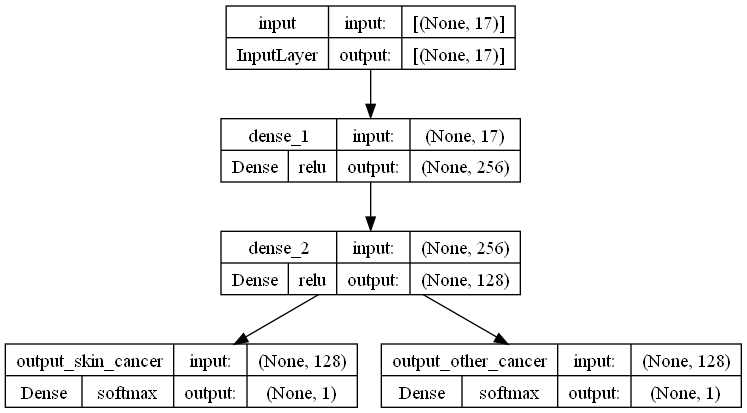

In [7]:
from keras.utils import plot_model

plot_model(model,to_file='model/model.png', show_shapes=True,show_layer_names=True, show_layer_activations=True)

In [8]:
model.save(filepath='model/model_conf.keras')